## <font size=5> <strong>Prediction of Credit Risk


## Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix
import pickle

import os

import warnings
warnings.filterwarnings('ignore')

## Understanding our dataset

In [2]:
dataset = pd.read_csv("Credit_Risk_Dataset.csv")

#### Verifying it as a 'dataframe' object in pandas

In [3]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [4]:
dataset.shape

(77536, 8)

#### Printing out a few columns

In [5]:
dataset.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [6]:
dataset.sample(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
58504,7500.0,6.294,39800,0.246231,2,0,9800,0
51872,9700.0,7.255,48900,0.386503,4,0,18900,0
42515,9400.0,7.133,47700,0.371069,3,0,17700,0
9486,11300.0,7.915,55100,0.455535,5,1,25100,0
77388,17600.0,10.585,80200,0.625935,11,2,50200,1


In [7]:
dataset.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


## Data Preprocessing

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [9]:
dataset.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

#### Analysing the 'target' variable

In [10]:
dataset["loan_status"].describe()

count    77536.000000
mean         0.032243
std          0.176646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [11]:
dataset["loan_status"].unique()

array([0, 1])

### Checking correlation between columns

In [12]:
print(dataset.corr()["loan_status"].abs().sort_values(ascending=False))

loan_status         1.000000
interest_rate       0.758900
borrower_income     0.758890
total_debt          0.758890
loan_size           0.758846
num_of_accounts     0.749802
debt_to_income      0.589305
derogatory_marks    0.553187
Name: loan_status, dtype: float64


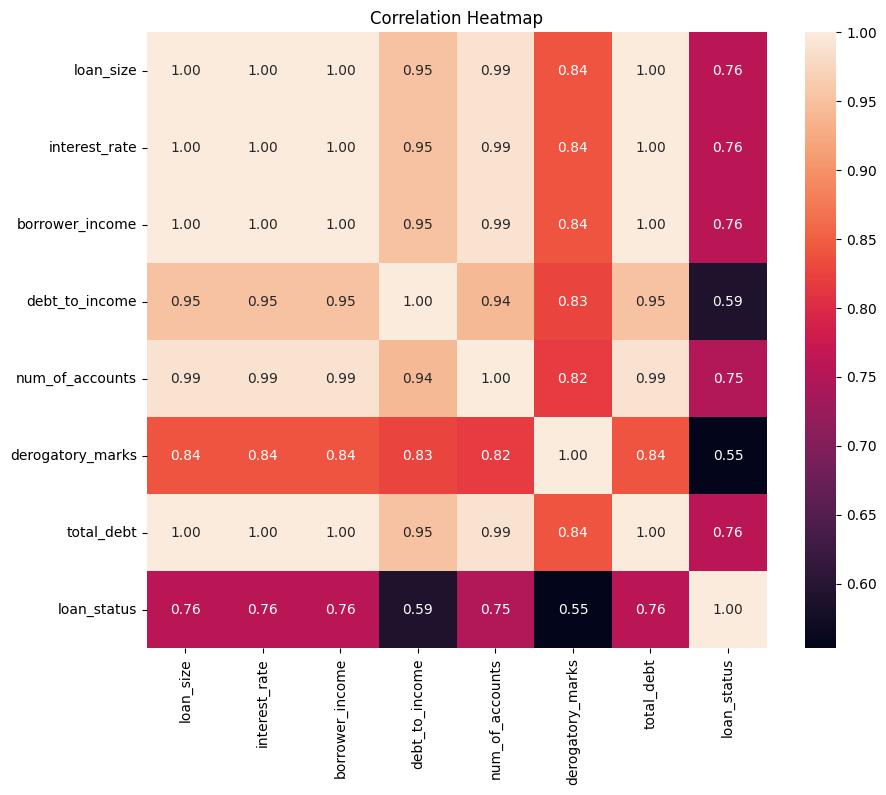

In [13]:

corr_matrix = dataset.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Exploratory Data Analysis (EDA)

#### Visualizatize the target variable:

<Axes: ylabel='count'>

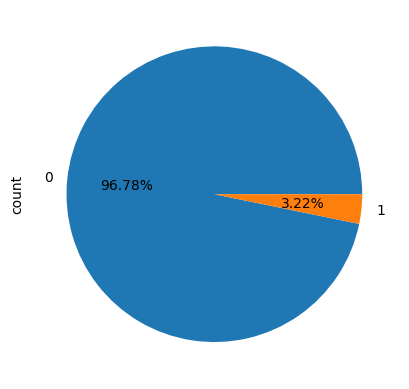

In [14]:
dataset['loan_status'].value_counts().plot(kind='pie',autopct='%1.2f%%')


#### Applying the SMOTE for imbalanced dataset




In [15]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df=dataset

X = df.drop('loan_status', axis=1)
y = df['loan_status']

print("Class distribution before SMOTE:", Counter(y))

# Apply SMOTE
smote = SMOTE(sampling_strategy=0.5)  # Adjust sampling_strategy
X_resampled, y_resampled = smote.fit_resample(X, y)
# Check the class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))

df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['loan_status'])], axis=1)

df_resampled.to_csv('resampled_dataset.csv', index=False)

Class distribution before SMOTE: Counter({0: 75036, 1: 2500})
Class distribution after SMOTE: Counter({0: 75036, 1: 37518})


In [16]:
dataset=pd.read_csv('resampled_dataset.csv')

In [17]:
dataset.isnull().sum()

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

<Axes: ylabel='count'>

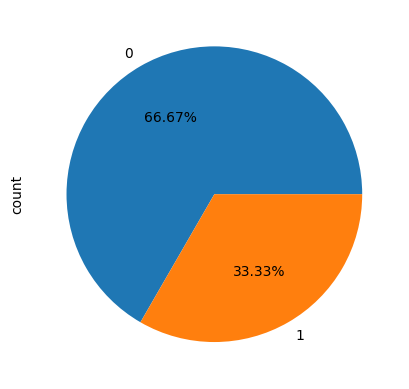

In [18]:
dataset['loan_status'].value_counts().plot(kind='pie',autopct='%1.2f%%')

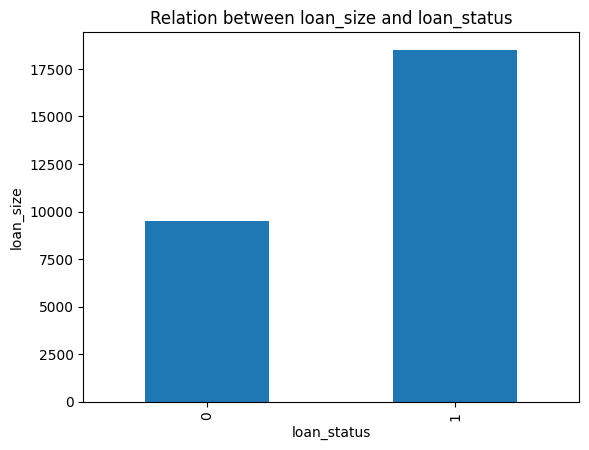

In [19]:

loan_size_loan_status=dataset.groupby('loan_status')['loan_size'].mean()
loan_size_loan_status.plot.bar()
plt.title('Relation between loan_size and loan_status')
plt.xlabel('loan_status')
plt.ylabel('loan_size')
plt.show()

## Features and Label Seperation

In [20]:

features = dataset[['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income', 'num_of_accounts', 'derogatory_marks', 'total_debt']]
target = dataset["loan_status"]

## Train Test split

In [21]:
# from sklearn.utils import shuffle
# predictors,target = shuffle(predictors,target,random_state = 1)

X_train, X_test, Y_train, Y_test = train_test_split(features, target, test_size=0.20, random_state=2)


In [22]:
X_train.shape

(90043, 7)

In [23]:
X_test.shape

(22511, 7)

In [24]:
Y_train.shape

(90043,)

In [25]:
Y_test.shape

(22511,)

## Applying Techniques

Classification Techniques

### Random Forest Classifier

In [26]:
th_RFC = RandomForestClassifier(n_estimators=100, random_state=42)
th_RFC.fit(X_train, Y_train)

pred_label_RFC = th_RFC.predict(X_test)

ac_score_RFC = accuracy_score(Y_test, pred_label_RFC)
print("Random Forest Classifier - Accuracy:", ac_score_RFC)
print("Random Forest Classifier - Precision:", precision_score(Y_test, pred_label_RFC))
print("Random Forest Classifier - Recall:", recall_score(Y_test, pred_label_RFC))
print("Random Forest Classifier - F1 Score:", f1_score(Y_test, pred_label_RFC))
print("Random Forest Classifier - Classification Report:")
print(classification_report(Y_test, pred_label_RFC))

Random Forest Classifier - Accuracy: 0.9937363955399583
Random Forest Classifier - Precision: 0.9869281045751634
Random Forest Classifier - Recall: 0.9942219833378124
Random Forest Classifier - F1 Score: 0.9905616172434566
Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15069
           1       0.99      0.99      0.99      7442

    accuracy                           0.99     22511
   macro avg       0.99      0.99      0.99     22511
weighted avg       0.99      0.99      0.99     22511



### Gradient Boosting Classifier

In [27]:
th_GBC = GradientBoostingClassifier(n_estimators=100, random_state=42)
th_GBC.fit(X_train, Y_train)

pred_label_GBC = th_GBC.predict(X_test)

ac_score_GBC = accuracy_score(Y_test, pred_label_GBC)
print("Gradient Boosting Classifier - Accuracy:", ac_score_GBC)
print("Gradient Boosting Classifier - Precision:", precision_score(Y_test, pred_label_GBC))
print("Gradient Boosting Classifier - Recall:", recall_score(Y_test, pred_label_GBC))
print("Gradient Boosting Classifier - F1 Score:", f1_score(Y_test, pred_label_GBC))
print("Gradient Boosting Classifier - Classification Report:")
print(classification_report(Y_test, pred_label_GBC))

Gradient Boosting Classifier - Accuracy: 0.9946692727999644
Gradient Boosting Classifier - Precision: 0.9865762892078681
Gradient Boosting Classifier - Recall: 0.9974469228701962
Gradient Boosting Classifier - F1 Score: 0.9919818254710677
Gradient Boosting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15069
           1       0.99      1.00      0.99      7442

    accuracy                           0.99     22511
   macro avg       0.99      1.00      0.99     22511
weighted avg       0.99      0.99      0.99     22511



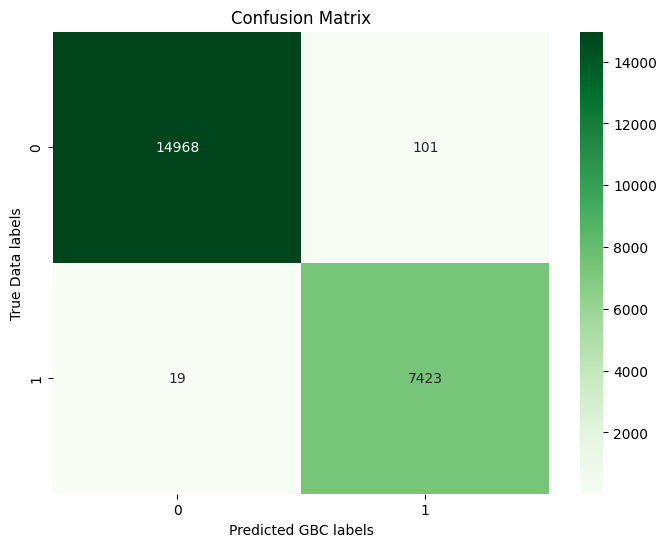

In [28]:
cm = confusion_matrix(Y_test, pred_label_GBC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g')
plt.xlabel('Predicted GBC labels')
plt.ylabel('True Data labels')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Classifier

In [29]:
th_SVC = SVC(kernel='rbf', random_state=42)
th_SVC.fit(X_train, Y_train)

pred_label_SVC = th_SVC.predict(X_test)

ac_score_SVC = accuracy_score(Y_test, pred_label_SVC)
print("Support Vector Machine Classifier - Accuracy:", ac_score_SVC)
print("Support Vector Machine Classifier - Precision:", precision_score(Y_test, pred_label_SVC))
print("Support Vector Machine Classifier - Recall:", recall_score(Y_test, pred_label_SVC))
print("Support Vector Machine Classifier - F1 Score:", f1_score(Y_test, pred_label_SVC))

Support Vector Machine Classifier - Accuracy: 0.9935587046332904
Support Vector Machine Classifier - Precision: 0.9861425716189207
Support Vector Machine Classifier - Recall: 0.9944907282988444
Support Vector Machine Classifier - F1 Score: 0.9902990566668898


In [30]:
print("Support Vector Machine Classifier - Classification Report:")
print(classification_report(Y_test, pred_label_SVC))

Support Vector Machine Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15069
           1       0.99      0.99      0.99      7442

    accuracy                           0.99     22511
   macro avg       0.99      0.99      0.99     22511
weighted avg       0.99      0.99      0.99     22511



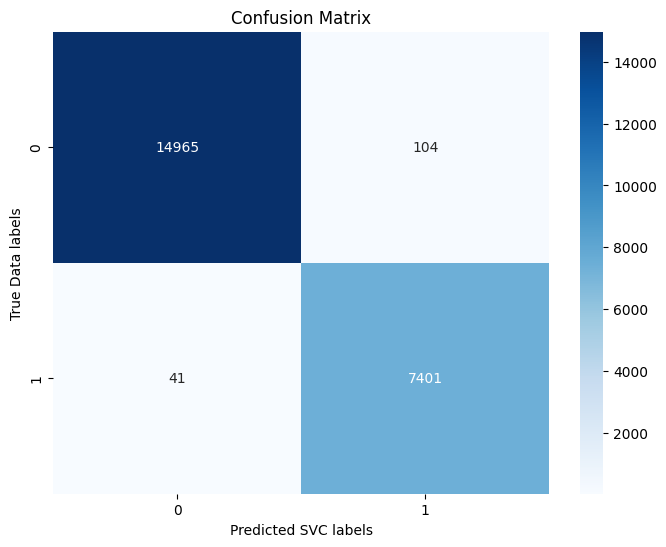

In [31]:
cm = confusion_matrix(Y_test, pred_label_SVC)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted SVC labels')
plt.ylabel('True Data labels')
plt.title('Confusion Matrix')
plt.show()

### Logistic Regression

In [32]:
th_LRC = LogisticRegression(random_state=42)
th_LRC.fit(X_train, Y_train)

pred_label_LRC = th_LRC.predict(X_test)

ac_score_LRC = accuracy_score(Y_test, pred_label_LRC)
print("Logistic Regression Classifier - Accuracy:", ac_score_LRC)
print("Logistic Regression Classifier - Precision:", precision_score(Y_test, pred_label_LRC))
print("Logistic Regression Classifier - Recall:", recall_score(Y_test, pred_label_LRC))
print("Logistic Regression Classifier - F1 Score:", f1_score(Y_test, pred_label_LRC))
print("Logistic Regression Classifier - Classification Report:")
print(classification_report(Y_test, pred_label_LRC))

Logistic Regression Classifier - Accuracy: 0.9927146728266181
Logistic Regression Classifier - Precision: 0.9862373062533405
Logistic Regression Classifier - Recall: 0.9918032786885246
Logistic Regression Classifier - F1 Score: 0.9890124614766179
Logistic Regression Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     15069
           1       0.99      0.99      0.99      7442

    accuracy                           0.99     22511
   macro avg       0.99      0.99      0.99     22511
weighted avg       0.99      0.99      0.99     22511



### K-Nearest Neighbors Classifier

In [33]:
th_KNN = KNeighborsClassifier(n_neighbors=5)
th_KNN.fit(X_train, Y_train)

pred_label_KNN = th_KNN.predict(X_test)

ac_score_KNN = accuracy_score(Y_test, pred_label_KNN)
print("K-Nearest Neighbors Classifier - Accuracy:", ac_score_KNN)
print("K-Nearest Neighbors Classifier - Precision:", precision_score(Y_test, pred_label_KNN))
print("K-Nearest Neighbors Classifier - Recall:", recall_score(Y_test, pred_label_KNN))
print("K-Nearest Neighbors Classifier - F1 Score:", f1_score(Y_test, pred_label_KNN))
print("K-Nearest Neighbors Classifier - Classification Report:")
print(classification_report(Y_test, pred_label_KNN))

K-Nearest Neighbors Classifier - Accuracy: 0.99400293189996
K-Nearest Neighbors Classifier - Precision: 0.9861610113107119
K-Nearest Neighbors Classifier - Recall: 0.9958344531040043
K-Nearest Neighbors Classifier - F1 Score: 0.9909741258273718
K-Nearest Neighbors Classifier - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     15069
           1       0.99      1.00      0.99      7442

    accuracy                           0.99     22511
   macro avg       0.99      0.99      0.99     22511
weighted avg       0.99      0.99      0.99     22511



## Output final scores

In [34]:
scoresC = [ac_score_RFC*100, ac_score_GBC*100, ac_score_SVC*100, ac_score_LRC*100, ac_score_KNN*100]

calgorithms = ["Random \n Forest \n Classifier", "Gradient \n Boosting \n Classifier", "Support \n Vector \n Classifier", "Logistic \n Regression", "K-Nearest \n Neighbors \n Classifier"]

for i in range(len(calgorithms)):
    print("The Classification Accuracy scores achieved using "+calgorithms[i]+" is: " + "{:.4f}".format(scoresC[i]) + " %")


The Classification Accuracy scores achieved using Random 
 Forest 
 Classifier is: 99.3736 %
The Classification Accuracy scores achieved using Gradient 
 Boosting 
 Classifier is: 99.4669 %
The Classification Accuracy scores achieved using Support 
 Vector 
 Classifier is: 99.3559 %
The Classification Accuracy scores achieved using Logistic 
 Regression is: 99.2715 %
The Classification Accuracy scores achieved using K-Nearest 
 Neighbors 
 Classifier is: 99.4003 %


## Classification Techniques Comparison

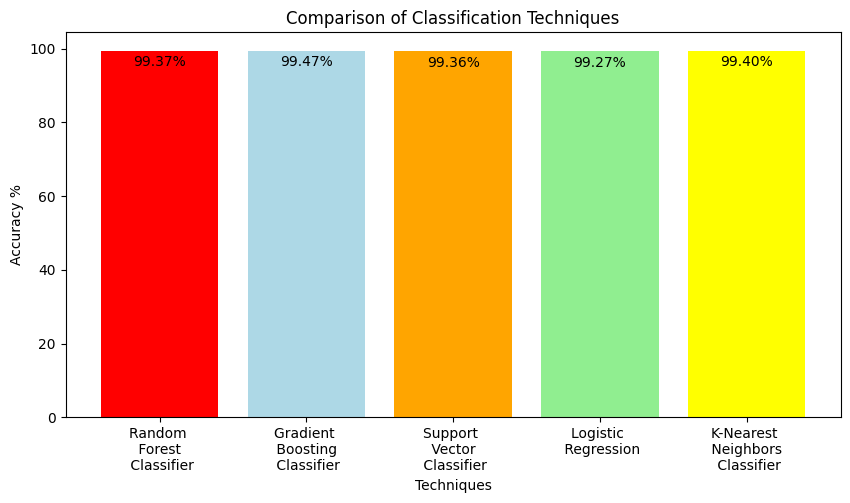

In [35]:
plt.figure(figsize=(10, 5))
bars = plt.bar(calgorithms, scoresC, color=['red', 'lightblue', 'orange', 'lightgreen', 'yellow'])
plt.xlabel('Techniques')
plt.ylabel('Accuracy %')
plt.title('Comparison of Classification Techniques')
for bar, score in zip(bars, scoresC):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{score:.2f}%',
             ha='center', va='bottom', color='black', fontsize=10)
plt.show()

### Gradient Boosting Classifier has good result as compare to other Techniques <br> <br>

In [36]:

pickle.dump(th_GBC, open('GRADIENT_TrainedModel.pkl', 'wb'))


In [37]:
print(pickle.load(open('GRADIENT_TrainedModel.pkl', 'rb')))


GradientBoostingClassifier(random_state=42)
